## Matplotlib: case COVID-19
Matplotlib is the most commonly used Python library for visualizing data. See https://jakevdp.github.io/PythonDataScienceHandbook/, a free online book by Jake Van der Plas, that covers a.o. pandas, matplotlib and machine learning.

In [2]:
import pandas as pd
import numpy as np

The Johns Hopins University publishes daily updated data about the spread of the COVID-19 virus: new cases, deaths and recovered. 

In [3]:
# link: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
covid = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',sep=',')

In [4]:
covid

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,38143,38162,38165,38196,38243,38288,38304,38324,38398,38494
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,9279,9380,9513,9606,9728,9844,9967,10102,10255,10406
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,43781,44146,44494,44833,45158,45469,45773,46071,46364,46653
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1124,1124,1176,1184,1199,1199,1215,1215,1215,1261
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,2551,2624,2654,2729,2777,2805,2876,2935,2965,2981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,21668,22204,22729,23281,23875,24471,25142,25575,26127,26779
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1946,1953,1958,1962,1976,1979,1983,1983,1987,1989
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,11902,12025,12097,12381,12415,12523,12639,12709,12776,12836


In [5]:
belgium = covid[covid['Country/Region']=='Belgium']
belgium

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20
23,NaN,Belgium,50.8333,4.469936,0,0,0,0,0,0,...,84599,85042,85236,85487,85911,86544,87174,87825,88367,88769


In [6]:
Brazil = covid[covid['Country/Region']=='Brazil']

In [7]:
Brazil.head(20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20
30,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,...,3846153,3862311,3908272,3950931,3997865,4041638,4091801,4123000,4137521,4147794


In [8]:
# make Series of inhabitants per country (source: wikipedia)
inhabitants = pd.Series()
inhabitants['Belgium'] = 11491346
inhabitants['France'] = 64834000  # metropolitan France only
inhabitants['Netherlands'] = 17424978
inhabitants['Italy'] = 60317546
inhabitants['Spain'] = 46733038
inhabitants['Germany'] = 83149300
inhabitants['China'] = 58500000 #Hubei only
inhabitants['United Kingdom'] = 67545757
inhabitants['US'] = 326625791
inhabitants['Iran'] = 82021564
inhabitants['Sweden'] = 9960487
inhabitants['Denmark'] = 5605948
inhabitants['Finland'] = 5518371 
inhabitants['Norway'] = 5367580
inhabitants['Austria'] = 8754413
inhabitants['Switzerland'] = 8236303
inhabitants['India'] = 1281935911
inhabitants['Brazil'] = 207353391

In [9]:
def DrawCurve(province,country,color):
    if province == '':
        df = covid[(covid['Country/Region']==country) & (covid['Province/State'].isnull())]  # isnull()==True if NaN
    else:
        df = covid[(covid['Province/State']==province) & (covid['Country/Region']==country)]

    df = df.drop(['Province/State','Country/Region','Lat','Long'],axis=1)
    
    df_2 = df.T  # transpose
    
    df_2 = df_2.rename(columns={df_2.columns[0]:'cases'})   

    df_2['new_cases'] = df_2['cases'] - df_2.cases.shift(1)  # shift(1) returns the previous line

    df_2['new_cases'] = np.round(df_2['new_cases']*1000000.0/inhabitants[country],1)  # cases per million inhabitants

    # skip days at beginning as long as new_cases (per million) < 10
    for index,row in df_2.iterrows():
        if row['new_cases'] >= 10:
            break
        else:
            df_2.drop(index,inplace=True)
  
    df_2 = df_2.reset_index() # brengt de index naar een kolom met naam 'index'

    df_2 = df_2.drop(['index'],axis=1)
    df_2 = df_2.reset_index()

    df_2['new_cases'] = df_2['new_cases'].rolling(7).mean() # moving average of last 7 days 
    df_2 = df_2.rename(columns={'index':'dayssincefirst'})
    
    plt.plot(df_2['dayssincefirst'], df_2['new_cases'], color=color, label=country+' '+province, linewidth=3.0)

In [10]:
from datetime import datetime
last_update = covid.columns[-1]
last_update = datetime.strptime(last_update, '%m/%d/%y')
last_update = datetime.strftime(last_update,'%Y-%m-%d')

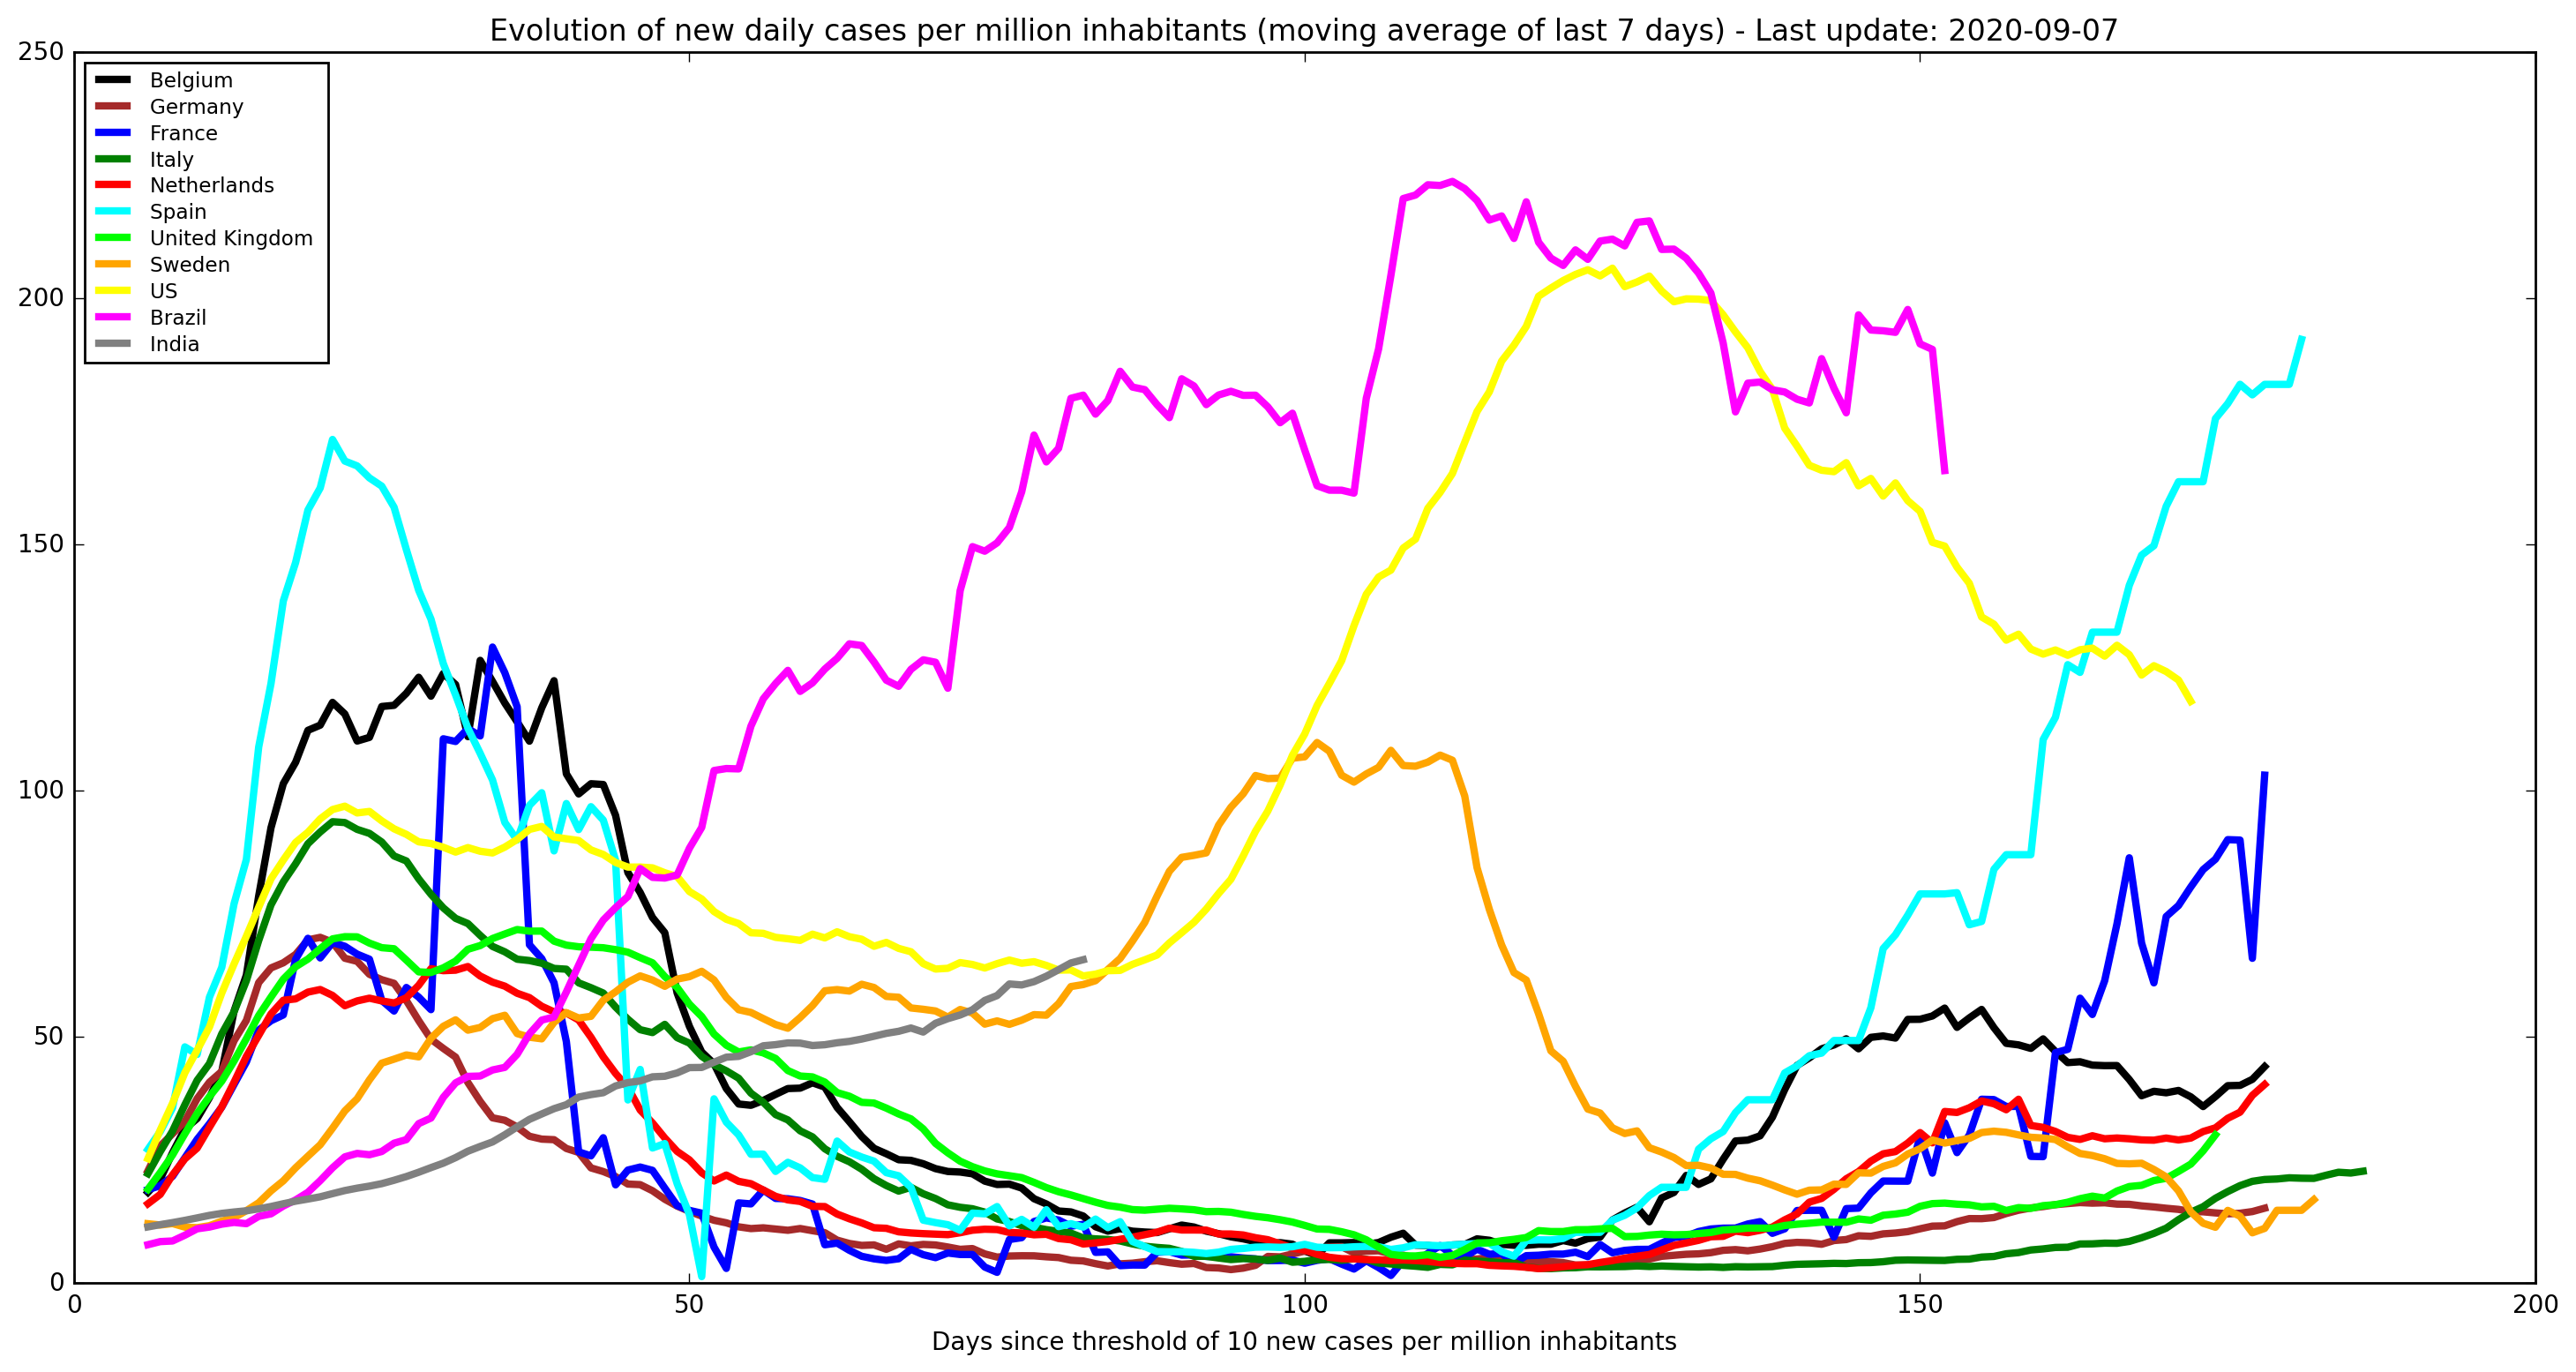

In [18]:
import matplotlib.pyplot as plt 
%matplotlib inline
# set the size of the diagrams
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18,9
rcParams['figure.dpi'] = 200
plt.xlabel('Days since threshold of 10 new cases per million inhabitants')
plt.ylim([0,250])
plt.title('Evolution of new daily cases per million inhabitants (moving average of last 7 days) - Last update: ' + last_update)
plt.style.use('classic')

DrawCurve('','Belgium',color='black')

DrawCurve('','Germany',color='brown')
DrawCurve('','France',color='blue')
DrawCurve('','Italy',color='green')
DrawCurve('','Netherlands',color='red')
DrawCurve('','Spain',color='cyan')
# DrawCurve('Hubei','China',color='magenta')
DrawCurve('','United Kingdom',color='#00ff00')
DrawCurve('','Sweden',color='orange')
DrawCurve('','US',color='yellow')
DrawCurve('','Brazil',color='magenta')
DrawCurve('','India',color='grey')

plt.legend(loc='upper left',fontsize='x-small',frameon=True)

plt.show()
    

In [12]:
# show top 10 of countries with most deaths per 1.000.000 inhabitants
# import data
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',sep=',')

# totaldeaths is value in last column
deaths['totaldeaths'] = deaths[deaths.columns[-1]]

# keep only relevant columns
deaths = deaths[['Country/Region','Province/State','totaldeaths']]
print(deaths.sort_values(by='totaldeaths',ascending=False).head(15))

def inh(c):
    if c in inhabitants:
        return inhabitants[c]
    else:
        return 1000000000
    
deaths['inhabitants'] = deaths['Country/Region'].map(inh)
print(deaths.head(15))
deaths['totaldeathspermillion'] = deaths['totaldeaths']*1000000/deaths['inhabitants']

Country/Region Province/State  totaldeaths
242              US            NaN       189208
30           Brazil            NaN       126960
143           India            NaN        72775
177          Mexico            NaN        67781
256  United Kingdom            NaN        41554
149           Italy            NaN        35553
126          France            NaN        30575
202            Peru            NaN        29838
226           Spain            NaN        29516
145            Iran            NaN        22410
89         Colombia            NaN        21615
208          Russia            NaN        17818
224    South Africa            NaN        15004
55            Chile            NaN        11652
106         Ecuador            NaN        10576
         Country/Region                Province/State  totaldeaths  \
0           Afghanistan                           NaN         1415   
1               Albania                           NaN          319   
2               Algeria    

In [13]:
# sort by totaldeaths
top10 = deaths.sort_values(by='totaldeathspermillion',ascending=False).head(10).reset_index().drop(['index'],axis=1).reset_index()
top10['Rank'] = top10['index'] + 1
top10 = top10[['Rank','Country/Region','totaldeathspermillion']]
top10

,Rank,Country/Region,totaldeathspermillion
0,1,Belgium,862.301074
1,2,Spain,631.587444
2,3,United Kingdom,615.197784
3,4,Brazil,612.288033
4,5,Italy,589.430478
5,6,Sweden,586.015523
6,7,US,579.280648
7,8,France,471.588981
8,9,Netherlands,358.278788
9,10,Iran,273.220833
